# Название проекта: Анализ данных "Стримчик"

# Описание.
    
- Нам предоставлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, наша задача - выявить определяющие успешность игры закономерности.

- С помощью полученных данных мы сможем проверить различные гипотезы, выявить тенденции пользователей, определить портрет пользователя в каждом предложенном регионе.

#  Цель исследования: 

- выявить определяющие успешность игры закономерности для планирования рекламных кампаний и прогнозирования продаж на следующий год.
 
# Задачи исследования:

 1. Подготовить данные для анализа, включая замену названий столбцов, преобразование данных в нужные типы и обработку пропусков.
 2. Провести исследовательский анализ данных, включая анализ количества выпущенных игр по годам, изменения продаж по платформам, выбор актуального периода для анализа, выявление лидирующих платформ по продажам и построение графиков для анализа влияния отзывов пользователей и критиков на продажи.
 3. Составить портрет пользователя каждого региона, определить самые популярные платформы и жанры, а также изучить влияние рейтинга ESRB на продажи в отдельных регионах.
 4. Проверить гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, а также о различии средних пользовательских рейтингов жанров Action и Sports.
 5. Сделать общий вывод на основе проведенного анализа данных и проверки гипотез
 
# План действий:

1. Подготовка данных:
   - Загрузить данные и изучить общую информацию о них.
   - Провести предобработку данных: заменить названия столбцов на более удобные, преобразовать данные в нужные типы, обработать пропуски при необходимости.
    
2. Исследовательский анализ данных:
   - Провести анализ количества выпущенных игр по годам, чтобы определить актуальный период для анализа.
   - Изучить изменения продаж по платформам за выбранный период, выявить лидирующие платформы по продажам.
   - Построить графики зависимости продаж от отзывов пользователей и критиков для выявления возможных закономерностей.

3. Портрет пользователя каждого региона:
   - Определить самые популярные платформы и жанры в каждом регионе.
   - Изучить влияние рейтинга ESRB на продажи в отдельных регионах.

4. Проверка гипотез:
   - Сформулировать и проверить гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC с помощью статистического теста.
   - Сформулировать и проверить гипотезу о различии средних пользовательских рейтингов жанров Action и Sports с помощью статистического теста.

5. Общий вывод:
   - Сделать общий вывод на основе проведенного анализа данных, проверки гипотез и выявленных закономерностей.
</b>


# Шаг 1. Откроем файл с данными /datasets/games.csv и изучим общую информацию.

In [81]:
#Загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy.stats import poisson
from scipy.stats import binom
from scipy import stats as st



In [82]:
df_games = pd.read_csv('/datasets/games.csv')

In [83]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [84]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим много пропущенных значений в столбцах Critic_Score, User_Score, Rating

# Шаг 2. Подготовим данные

- Заменим названия столбцов (приведем к нижнему регистру).

In [85]:
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- В столбце user_score данные числого формата имеют тип object. Преобразуем в float64

In [86]:
#Посмотрим уникальные значения
df_games['user_score'].unique()



array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим пропуски и видим значение 'tbd'. TBD - to be determined. Означает что рейтинг неизвестен, так как недостаточно данных (кол-ва оценок скорее всего в нашем случае).
Заменим tbd на NaN, так как можно посчитать такой недостаток данных как пропуск.

In [87]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.NaN)

#Теперь преобразуем данные в float64
df_games['user_score'] = df_games['user_score'].astype('float')

#Проверим
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [88]:
#Также поменяем тип данных в столбце год выпуска, оставим только год в формате datetime
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y')



df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Не понял как прильно заменить пропуски в столбце с годом выпуска. Решил оставить , посчитав что сильной статической значимости эти данные не понесут и эти данные нельзя восстановить.

Видим много пропущенных значений в столбцах Critic_Score, User_Score, Rating

In [91]:
#Теперь проверим столбец critic_score на уникальные значения
df_games['critic_score'].unique()



array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Непонятных значений нет, только NaN.

- Теперь обработаем пропуски в стобцах critic_score, user_score и rating. Значения в этих стобцах (оценки и рейтинг) определяются количеством оценок, соответсвенно пропуски можно объяснить недостаточным количеством данных.

In [92]:
#Заполним пропуски в столбце 'rating' значением 'unrated'
df_games['rating'] = df_games['rating'].fillna('unrated')

#Заполним пропуски в столбце 'user_score' и передадим значение '0'
df_games['user_score'] = df_games['user_score'].fillna('0')

#То же самое и для столбца 'critic_score'
df_games['critic_score'] = df_games['critic_score'].fillna('0')

In [93]:
#Проверим результат 
df_games.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

  Также еще остались пропущенные значения в столбцах name, genre и year_of_release. 
  Данные неизвестны, поэтому обработаем их так:

In [94]:
#Заполним пропуски в столбце 'name' значением 'unknown'
df_games['name'] = df_games['name'].fillna('unknown')

#Заполним пропуски в столбце 'genre' и передадим значение 'unknown'
df_games['genre'] = df_games['genre'].fillna('unknown')


In [95]:
#Поменяем тип данных на целые числа в столбце с оценкой критиков и тип float для столбца с оценкой пользователя
df_games['critic_score'] = df_games['critic_score'].astype('int')
df_games['user_score'] = df_games['user_score'].astype('float')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16715 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16715 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     16715 non-null  int64         
 9   user_score       16715 non-null  float64       
 10  rating           16715 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [96]:
#Проверим результат 
df_games.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Обработали все пропуски!  На среднее и медианное значение в нашем случае не надо менять, по моему мнению, так как это сильно исказит выводы в нашем исследовании. Поэтому заменили пропуски в данных '0'-значением или условно '0' ('unknown'). Например, в столбцах 'rating ', 'critic_score' и 'user_score' недостаточно данных для оценки или рейтинга, поэтому будем понимать почему там '0'.
Также поменяли тип данных в столбцах, где это необходимо.

- Создадим новый столбец, где посчитаем суммарные продажи во всех регионах для каждой игры.

In [97]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [98]:
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0,0.0,unrated,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unrated,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,0,0.0,unrated,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,0,0.0,unrated,28.31


Выводы после обработки:
    
- Заменили названия столбцов, привели к нижнему регистру;
    
- Преобразовали данные в нужные типы:
'year_of_release' был преобразован в тип данных datetime;
'critic_score' и 'user_score' были преобразованы в числовой тип данных;
    
- Пропуски в столбцах 'critic_score', 'user_score', 'rating' поменяли на '0', так как заполнение их средними или медианными значениями может исказить анализ. Обработали аббревиатуру 'tbd' в столбце пользовательской оценки также заменили на '0', так как этот показатель означает нехватку оценок;
    
- В столбцах 'genre' и 'name' пропуски заполнили значением 'unknown';
    
- Создали новый столбец 'total_sales', где посчитали сумму всех продаж по регионам.




In [99]:
df_games.duplicated().sum()

0

Полных дубликатов нет.

In [100]:
#Посмотрим явные дубликаты для пары Имя-Платформа
duplicates = df_games[df_games.duplicated(subset=['name', 'platform'],keep='first')]
display(duplicates.sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.0,0.01,0.00,0.00,83,5.5,E,0.01
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08
4127,Sonic the Hedgehog,PS3,NaT,Platform,0.0,0.48,0.00,0.00,43,4.1,E10+,0.48
14244,unknown,GEN,1993-01-01,unknown,0.0,0.00,0.03,0.00,0,0.0,unrated,0.03


Видим дубликаты игр Madden, Sonic,  Unknown и NFS.
Следующим шагом удалим явные дубликаты.

In [101]:
df_games.drop_duplicates(subset = ['name', 'platform'], keep = 'first').reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0,0.0,unrated,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,0,0.0,unrated,0.01
16706,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,0,0.0,unrated,0.01
16707,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,0,0.0,unrated,0.01
16708,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,0,0.0,unrated,0.01


Удалили явные дубликаты, строк стало 16710, а было 16715

In [102]:
duplicates_1 = df_games[df_games.duplicated(subset=['name', 'platform'], keep=False)]
display(duplicates_1.sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.00,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01
1190,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.00,0.06,0.00,0.02,82,8.5,T,0.08
1745,Sonic the Hedgehog,PS3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,NaT,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+,0.48
659,unknown,GEN,1993-01-01,unknown,1.78,0.53,0.00,0.08,0,0.0,unrated,2.39
14244,unknown,GEN,1993-01-01,unknown,0.00,0.00,0.03,0.00,0,0.0,unrated,0.03


Должен был удалить дубликаты этих игр, но снова выводит их на экран. Не рахобрался что нужно сделать.

# Шаг 3. Проведем исследовательский анализ данных

- Посмотрим на дубликаты игр по годам.

In [103]:
duplicates = df_games[df_games.duplicated(subset=['name', 'year_of_release'],keep='first')]
display(duplicates.sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3862,Frozen: Olaf's Quest,DS,2013-01-01,Platform,0.21,0.26,0.00,0.04,0,0.0,unrated,0.51
14658,007: Quantum of Solace,PC,2008-01-01,Action,0.01,0.01,0.00,0.00,70,6.3,T,0.02
1785,007: Quantum of Solace,PS3,2008-01-01,Action,0.43,0.51,0.02,0.19,65,6.6,T,1.15
4475,007: Quantum of Solace,PS2,2008-01-01,Action,0.17,0.00,0.00,0.26,0,0.0,unrated,0.43
3120,007: Quantum of Solace,Wii,2008-01-01,Action,0.29,0.28,0.01,0.07,54,7.5,T,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010-01-01,Sports,0.05,0.30,0.29,0.16,74,5.8,E,0.80
4664,pro evolution soccer 2011,PS2,2010-01-01,Sports,0.04,0.21,0.05,0.11,0,6.7,E,0.41
12648,pro evolution soccer 2011,PC,2010-01-01,Sports,0.00,0.05,0.00,0.01,79,0.0,unrated,0.06
15612,uDraw Studio: Instant Artist,X360,2011-01-01,Misc,0.01,0.01,0.00,0.00,54,5.7,E,0.02


- Удалим явные дубликаты игр, выпущенных в один год, но на разных платформах.

In [104]:
df_games = df_games.drop_duplicates(subset=['name', 'year_of_release'], keep='first')
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12428 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             12428 non-null  object        
 1   platform         12428 non-null  object        
 2   year_of_release  12196 non-null  datetime64[ns]
 3   genre            12428 non-null  object        
 4   na_sales         12428 non-null  float64       
 5   eu_sales         12428 non-null  float64       
 6   jp_sales         12428 non-null  float64       
 7   other_sales      12428 non-null  float64       
 8   critic_score     12428 non-null  int64         
 9   user_score       12428 non-null  float64       
 10  rating           12428 non-null  object        
 11  total_sales      12428 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.2+ MB
None


- Посмотрим, сколько игр выпускалось в разные годы

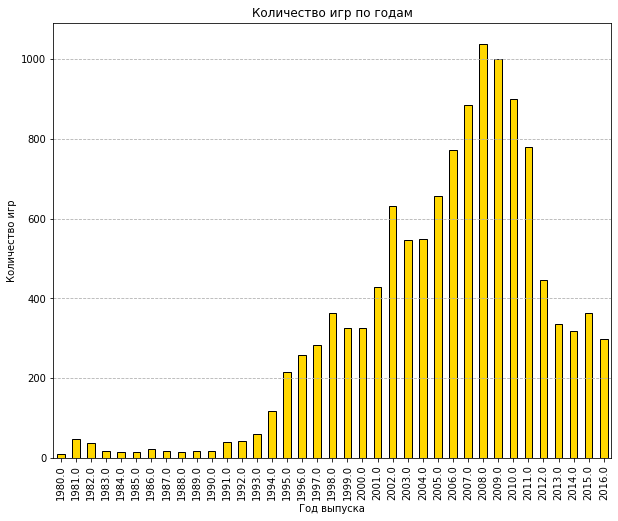

In [105]:
#Посчитаем сколько игр выпущено за каждый год
games_per_year = df_games['year_of_release'].dt.year.value_counts().sort_index()
#print(games_per_year)

#Построим диаграмму для наглядности
plt.figure(figsize=(10, 8))
games_per_year.plot(kind='bar', color='gold',edgecolor='black')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(axis = 'y', linestyle = '--', alpha = 1)
plt.show()




На графике мы видим:
- Зародилась индустрия игр в 1980 году, а активные продажи игр начались примерно в 1991-1995 годах;
- В 2001 году начинается рост производства, вероятнее всего это связано с развитием интернет-индустрии;
- Пик развития индустрии приходится на 2008-2009 годы, далее начинается спад (резкий спад в 2012 году). Скорее всего это связано с появляением прорывных технологий (iPhone, iPad и пр.), которые многим стали постепенно заменять игровые консоли. В связи в этим спрос упал.

- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [106]:
#Сгруппируем платформы и суммируем по продажам. Далее посмотрим на топ-5 платформ
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5)
print(top_platforms)

platform
PS2     1164.63
Wii      800.85
DS       719.82
PS       718.57
X360     592.75
Name: total_sales, dtype: float64


PS2 лидирует по продажам с явным перевесом. 

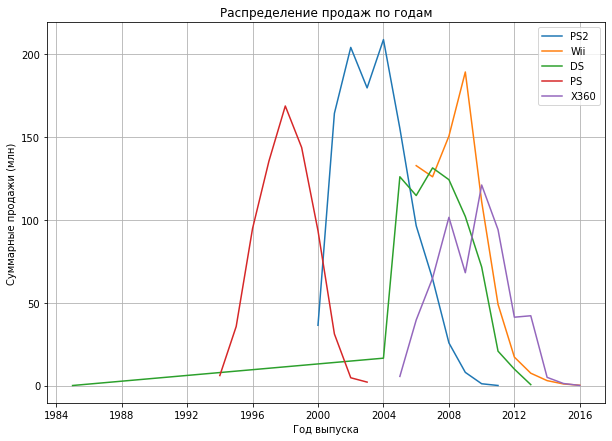

In [107]:
#Построим график распределения продаж по годам.
plt.figure(figsize = (10, 7))
for platform in top_platforms.index:
    platform_data = df_games[df_games['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year, label = platform)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.title('Распределение продаж по годам')
plt.legend()
plt.grid(True)
plt.show()


На графике видим следующее:
- PS2 появилась в продаже в 2000 году, пик продаж игр выпал на период до 2004 года и окончательно упал в 2010-2011;
- Xbox появился в 2005 году и продажи игр были на пике в 2010 году;
- PS3 стали продавать в 2006 году и пик продаж игр выпал на 2010-2011 годы;
- Nintendo Wii также появилась на полках в 2006 году и на первых порах видим, что она обогнала в 2009 по продажам игр выше упомянутые приставки этого года, но далее видим резкий спад (видимо, уступала конкурентам по техническим показателям и количестве выпускаемых игр);
- Nintendo DS самая старая приставка среди топ-5, была выпущена в 1984. Первое название было Nintendo Famicom. Далее был ребрендинг в 2004 году и новое название было как раз Nintendo DS. Пик продаж игр был в 2005 году и после 2008 продажи стали падать, так как в этот период набрали популярность Xbox, PS3 и Nintendo Wii.

По итогу видим резкий спад у двух самых популярных приставок того времени (Xbox и PS3), связано это с появлением приставок нового поколения - Xbox One и PS4 в 2013 году. Среднее время "жизни" приставки ~10 лет. Новые поколения приставок заменяют старые.

- Возьмем за актуальный период игры с 2014 года.

In [108]:
#Отфильтруем данные, год выпуска после 2014
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], errors='coerce').dt.year
games_filtered = df_games[df_games['year_of_release'] >= 2014]

#Сгруппируем по платформам и просуммируем продажи и возьмем топ-5
platform_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(20)

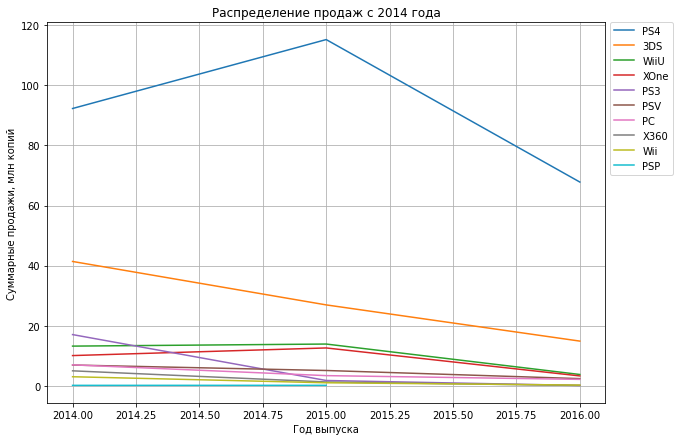

In [109]:
#Построим график
plt.figure(figsize = (10, 7))
for platform in top_platforms.index:
    platform_data = games_filtered[games_filtered['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year, label=platform)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.title('Распределение продаж с 2014 года')
plt.legend(loc='right', bbox_to_anchor=(1.13, 0.8))
plt.grid(True)
plt.show()

- На графике видим наибольший спрос на игры PS4 от 60 до 120 млн проаднных игр. Далее идут Nintendo 3Ds, Nintendo Wii и Xbox One.
Пики выпущенным играм на PS4, Xbox One и Nintendo Wii были в начале 2015 года. На Nintendo 3Ds из года в год уменьшается кол-во игр ~ на 15 млн с каждым годом.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за 2016 год.

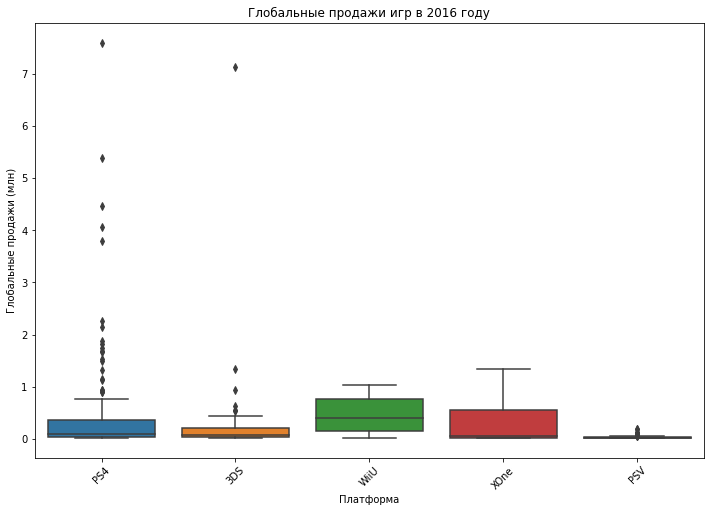

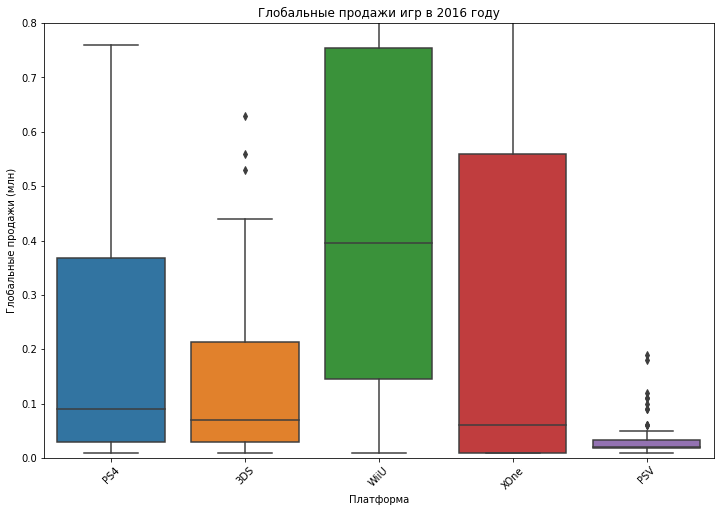

In [110]:
#Определим топ-5 платформ по глобальным продажам за 2016 год
games_2016 = games_filtered[games_filtered['year_of_release'] == 2016]
top_platforms = games_2016.groupby('platform')['total_sales'].sum().nlargest(5).index
df_top_platforms = games_2016[games_2016['platform'].isin(top_platforms)]

#Построим "ящик с усами"
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_top_platforms, order = top_platforms)
plt.title('Глобальные продажи игр в 2016 году')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation = 45)
plt.show()

#Приблизим
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_top_platforms, order = top_platforms)
plt.title('Глобальные продажи игр в 2016 году')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation = 45)
plt.ylim(0,0.8)
plt.show()

- На графике видим:
    
  - PS4 является лидером по продажам игр на 2016 год, имеет медианное значение 0.9 млн, межквартильный размах от 0.04 до 0.35 млн продаж, но мы видим на первом графике много выбросов от 1 до 7 млн;
    
  - Nintendo 3Ds с медианой 0.07 млн, межквартильный размех от 0.04 до 0.21 млн, есть выбросы до 1.5 млн и 1 выброс 7 млн;
    
  - у Nintendo Wii медиана 0.4 млн, межквартильный размах от 0.15 до 0.75 млн(это самый высокий показатель медианного значения), но нет выбросов с продажами более 1 млн;
    
  - Xbox One имеет медиану 0.05 млн и межквартильный размах от 0.01 до 0.55 млн. Выбросов нет;
    
  - PS Vita имеет медиана в 0.02 млн и межквартильный размах в пределах 0.01 и 0.03 млн.

Посмотрим на самые популярные платформы за актуальный период.

In [111]:
platform_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head()

platform
PS4     275.39
3DS      83.08
WiiU     30.72
XOne     25.79
PS3      18.77
Name: total_sales, dtype: float64

- Построим диаграммы размаха по глобальным продажам топ-3 приставок за актуальный период.

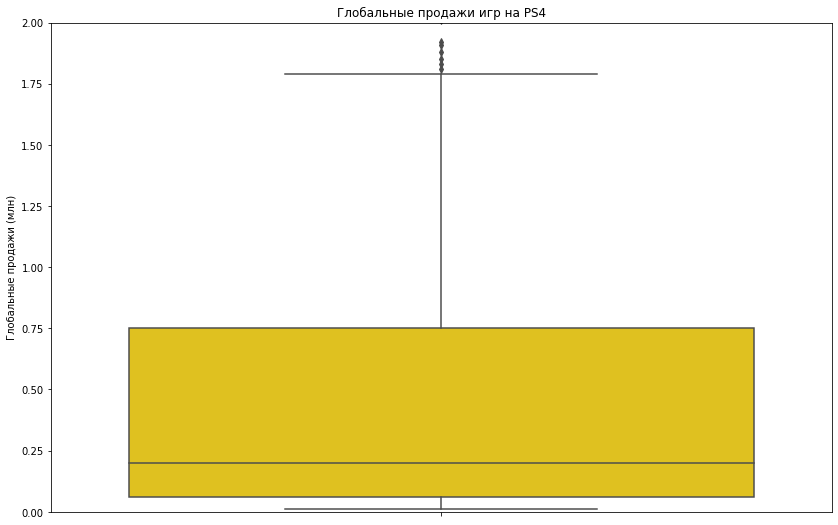

In [112]:
#Построим диаграмму размаха для продаж игр на PS4
df_ps4 = games_filtered[games_filtered['platform'] == 'PS4']

plt.figure(figsize = (14, 9))
sns.boxplot( y = 'total_sales', data = df_ps4, color = 'gold')
plt.title('Глобальные продажи игр на PS4')
plt.ylabel('Глобальные продажи (млн)')
plt.ylim(0,2)
plt.show()






Среднее количество продаж игр на PS4 составляет до 1.75 млн. Медианное значение ~0.2 млн. Не слишком большое значение.

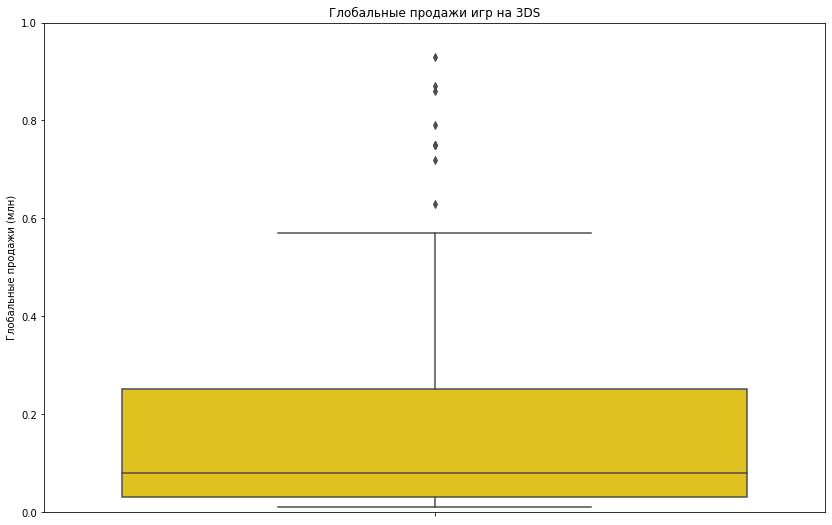

In [113]:
#Построим диаграмму размаха для продаж игр на 3Ds
df_3ds = games_filtered[games_filtered['platform'] == '3DS']

plt.figure(figsize = (14, 9))
sns.boxplot( y = 'total_sales', data = df_3ds, color = 'gold')
plt.title('Глобальные продажи игр на 3DS')
plt.ylabel('Глобальные продажи (млн)')
plt.ylim (0,1)
plt.show()


У Nintendo 3Ds видим медиану продаж 0.08 млн и межквартильный размах от 0.04 до 0.26 млн.

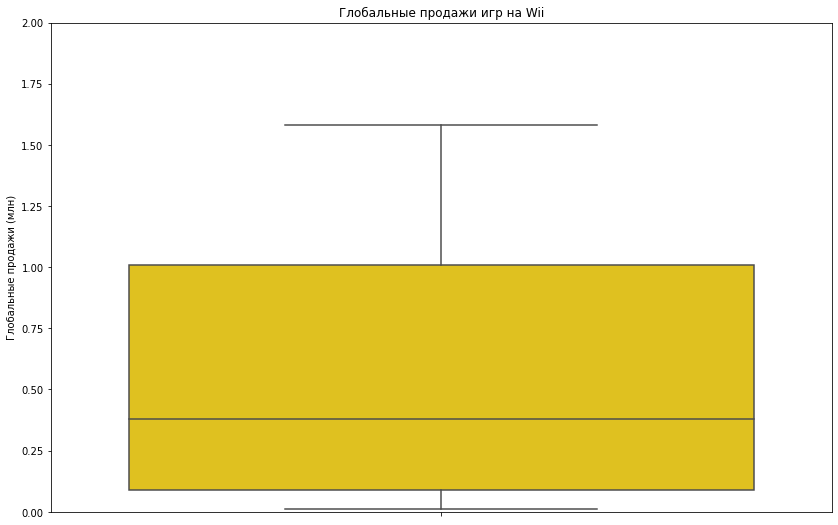

In [114]:
#Построим диаграмму размаха для продаж игр на PS2
df_wiiu = games_filtered[games_filtered['platform'] == 'WiiU']

plt.figure(figsize = (14, 9))
sns.boxplot( y = 'total_sales', data = df_wiiu , color = 'gold')
plt.title('Глобальные продажи игр на Wii')
plt.ylabel('Глобальные продажи (млн)')
plt.ylim(0,2)
plt.show()


У платформы Nintendo Wii медиана составляет ~ 0.4 млн, межквартильный размах от 0.1 до 1 млн. Среднее количество продаж до 1.6 млн

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
- Возьмем платформу PS3 для примера.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

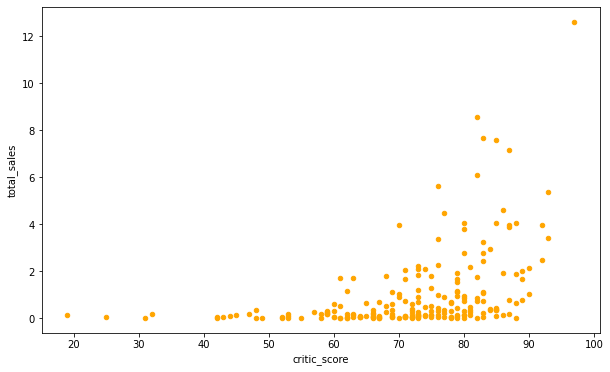

In [115]:
#Создадим переменную с PS4
data_ps4 = games_filtered[(games_filtered['platform'] == 'PS4') & (games_filtered['critic_score'] > 0)]

#Посмотрим диаграмму рассеяния относительно оценки критиков
data_ps4.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', color = 'orange', figsize=(10,6))   


По этой диаграмме можно сказать, что продажи игр растут с увеличением оценки критиков. Вполне логичный вывод, высокая оценка говорит о популярности игры на рынке.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

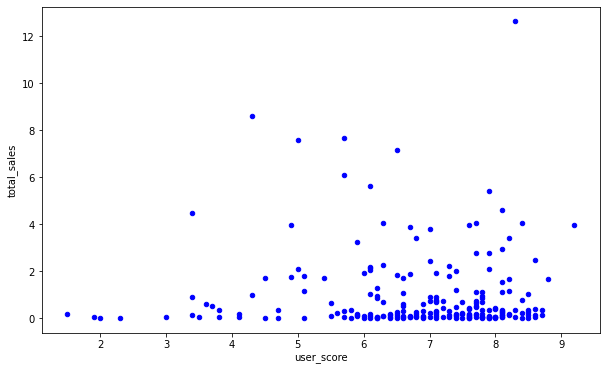

In [116]:
#Посмотрим диаграмму рассеяния относительно оценки пользователей
data_ps4 = games_filtered[(games_filtered['platform'] == 'PS4') & (games_filtered['user_score'] > 0)]
data_ps4.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', color = 'blue', figsize=(10,6))

На этом графике также видим рост показателя по продажам игр относительно роста оценки пользователя. 

In [117]:
#Посчитаем корреляцию относительно оценок и продаж.
correlation_user = data_ps4['user_score'].corr(data_ps4['total_sales'])
correlation_critic = data_ps4['critic_score'].corr(data_ps4['total_sales'])

print(f'Корреляция между отзывами пользователей и продажами: {correlation_user}')
print(f'Корреляция между отзывами критиков и продажами: {correlation_critic}')


Корреляция между отзывами пользователей и продажами: -0.030789529878820755
Корреляция между отзывами критиков и продажами: 0.36152769199970514


Коэффицент корреляции - 0.03 между отзывами пользователей и продажами указывает на  очень слабую отрицательную линейную зависимость между двумя переменными.  
Коэффицент корреляции 0.36 указывает на слабую положительную линейную зависимость между переменными, но уже сильнее, чем в предыдущем случае. Увеличение рейтинга критиков более явно сопровождается увеличением количества продаж.

- Соотнесем выводы со следующей по продажам приставкой Nintendo Wii

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

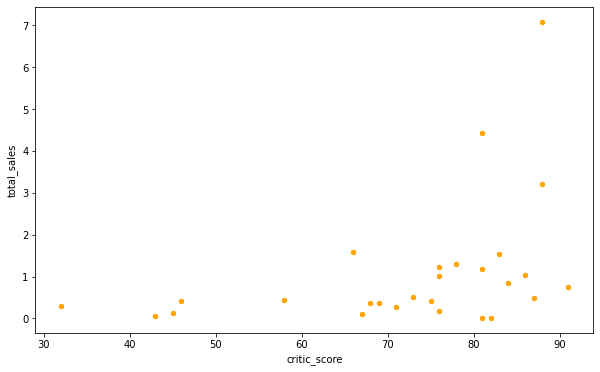

In [118]:
#Создадим переменную с Nintendo Wii
data_wiiu = games_filtered[(games_filtered['platform'] == 'WiiU') & (games_filtered['critic_score'] > 0)]

#Посмотрим диаграмму рассеяния относительно оценки критиков
data_wiiu.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', color = 'orange', figsize=(10,6))   


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

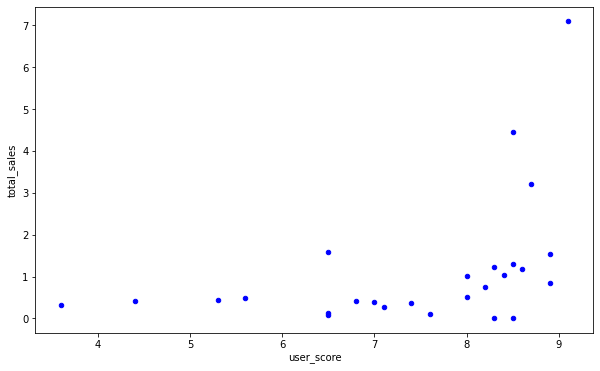

In [119]:
#Посмотрим диаграмму рассеяния относительно оценки пользователей
data_wiiu = games_filtered[(games_filtered['platform'] == 'WiiU') & (games_filtered['user_score'] > 0)]
data_wiiu.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', color = 'blue', figsize=(10,6))

In [120]:
#Посчитаем корреляцию относительно оценок и продаж.
correlation_user_x = data_wiiu['user_score'].corr(data_wiiu['total_sales'])
correlation_critic_x = data_wiiu['critic_score'].corr(data_wiiu['total_sales'])

print(f'Корреляция между отзывами пользователей и продажами: {correlation_user_x}')
print(f'Корреляция между отзывами критиков и продажами: {correlation_critic_x}')


Корреляция между отзывами пользователей и продажами: 0.42198802974083843
Корреляция между отзывами критиков и продажами: 0.39996064744692794


Достаточно сильная положительная линейная связь между отзывами пользователей и продажами - 0.42. Чуть менее сильная положительная связь между отзывами критиков и продажами - 0.4.
Можно сказать, что для игры приставки Nintendo Wii более выраженная связь между отзывами и продажами, в сравнении с PS4
- Теперь возьмем топ-10 платформ и посмотрим на показатель корреляции.

              total_sales  user_score  critic_score
total_sales      1.000000    0.193087      0.266193
user_score       0.193087    1.000000      0.910289
critic_score     0.266193    0.910289      1.000000


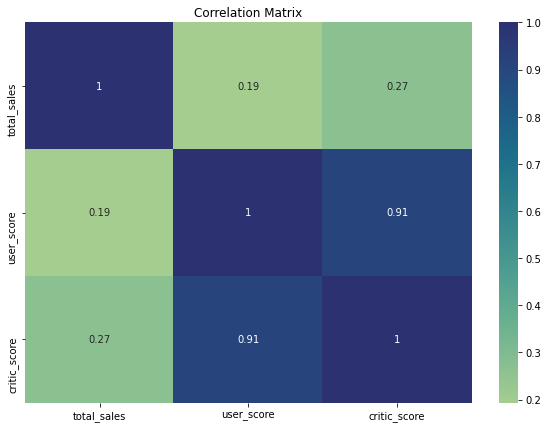

In [121]:
#Отфильтруем топ-10 платформ с выпущенными играми после 2005 года (переменную уже создавали до этого с годом)
games_filtered = games_filtered[games_filtered['platform'].isin(games_filtered['platform'].value_counts().head(10).index)]

#Построим матрицу корреляции
correlation_matrix = games_filtered[['total_sales', 'user_score', 'critic_score']].corr()
print(correlation_matrix)

#Также можно построить тепловую карту
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()


- На примере топ-10 платформ по выпуску игр с 2014 года видим, что есть слабая положительная линейная связь. Корреляция между оценкой критиков и продажами - 0.27. Между оценкой пользователей и продажами - 0.19.Положительная линейная связь есть между этими показателями, но слабая.

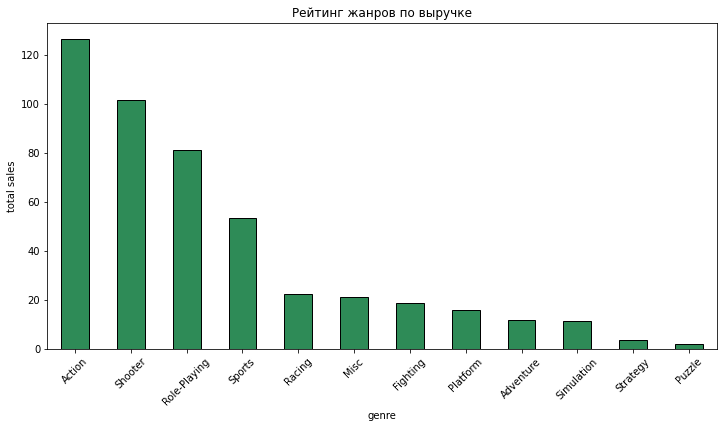

Самые прибыльные жанры: genre
Action          126.61
Shooter         101.66
Role-Playing     81.27
Name: total_sales, dtype: float64

Жанры с наименьшими продажами: genre
Simulation    11.61
Strategy       3.61
Puzzle         2.09
Name: total_sales, dtype: float64


In [122]:
#Сгруппируем данные по жанру и суммируем продажи
genre_sales = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

#Построим график
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='seagreen', edgecolor = 'black')
plt.title('Рейтинг жанров по выручке')
plt.xlabel('genre')
plt.ylabel('total sales')
plt.xticks(rotation=45)
plt.show()

print("Самые прибыльные жанры:",genre_sales.head(3))
print("\nЖанры с наименьшими продажами:",genre_sales.tail(3))








Не удивительно, что игры жанра "Action" являются такими популярными, ведь эта разновидность появилась раньше всех и сама по себе динамика таких игр не надоедает пользователям. Первая Fifa появилась в 1993 году, и по сей день является одной из самых топовых игр среди всех остальных, не говоря уже о других играх жанра "Sports". Шутеры также уже очень давно популярны среди пользователей. Взять например, всемирно известный COD, которые практически каждый год выпускают продолжения, дополнения и прочее. 
Пазлы являются детским жанром, поэтому рассчитаны на определенных пользователей, отсюда и низкие продажи. Качественные игры в жанрах Adventure и Strategy выпускаются редко, это сложные по своей наполненности игры и их нельзя штамповать как условную Fifa из года в год. В этих жанрах нужно постоянно добавлять новое и увлекать пользователя, отсюда и такие низкие показатели. В целом игр этих жанров не так много, их производство требует больших финансов.


- Рассмотрим теперь медианные значения продаж по жанрам, так как количество выпускаемых игр жанра Action сильно превышает остальные.  

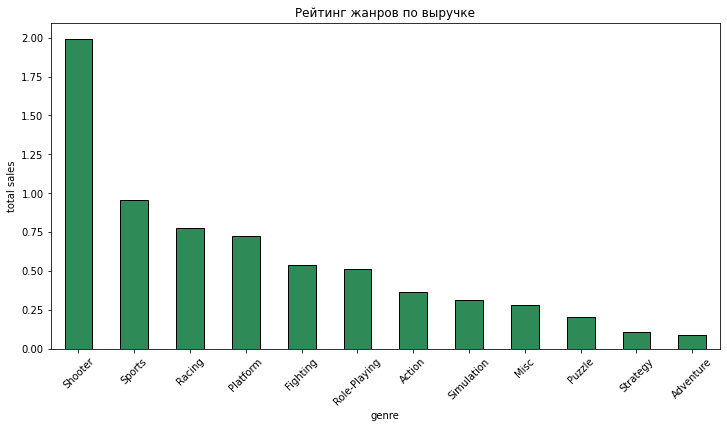

Самые прибыльные жанры: genre
Shooter    1.993333
Sports     0.955893
Racing     0.775172
Name: total_sales, dtype: float64

Жанры с наименьшими продажами: genre
Puzzle       0.209000
Strategy     0.112812
Adventure    0.091395
Name: total_sales, dtype: float64


In [123]:
genre_sales = games_filtered.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

#Построим график
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='seagreen', edgecolor = 'black')
plt.title('Рейтинг жанров по выручке')
plt.xlabel('genre')
plt.ylabel('total sales')
plt.xticks(rotation=45)
plt.show()

print("Самые прибыльные жанры:",genre_sales.head(3))
print("\nЖанры с наименьшими продажами:",genre_sales.tail(3))

Да, действительно. Правильные выводы нужно делать по второму графику, где представлены средние значения по продажам.
    
- Шутеры приносят в среднем 2 млн ;
    
- Игры в жанре Спорт ~1млн;
    
- Гонки приносят ~0.8 млн.
    
- Action при таком расладе лишь на 7 месте по выручке;
    
- Самые не прибыльные жанры Puzzle, Strategy и Adventure. 

# Шаг 4. Составим портрет пользователя каждого региона. 

- Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)

In [124]:
#Сгруппируем данные по платформе и региону
platform_sales_na = games_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
platform_sales_eu = games_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
platform_sales_jp = games_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

#Посчитаем доли для каждого региона
total_sales_na = games_filtered['na_sales'].sum()
sales_percent_na = (platform_sales_na / total_sales_na) * 100 

total_sales_eu = games_filtered['eu_sales'].sum()
sales_percent_eu = (platform_sales_eu / total_sales_eu) * 100

total_sales_jp = games_filtered['jp_sales'].sum()
sales_percent_jp = (platform_sales_jp / total_sales_jp) * 100

#Выведем на экран долю продаж в каждом регионе
print("Доля продаж по топ-5 платформам в Северной Америке:", sales_percent_na)
print("\nДоля продаж по топ-5 платформам в Европе:", sales_percent_eu)
print("\nДоля продаж по топ-5 платформам в Японии:", sales_percent_jp)




Доля продаж по топ-5 платформам в Северной Америке: platform
PS4     59.291200
3DS     13.282135
XOne     9.486340
WiiU     8.290319
PS3      3.405514
Name: na_sales, dtype: float64

Доля продаж по топ-5 платформам в Европе: platform
PS4     70.906516
3DS      8.181303
WiiU     5.178470
PC       4.895184
XOne     4.662890
Name: eu_sales, dtype: float64

Доля продаж по топ-5 платформам в Японии: platform
3DS     55.168104
PS4     16.722910
PSV     13.185852
WiiU     7.786527
PS3      6.611674
Name: jp_sales, dtype: float64


- Самые популярные платформы в Северной Америке считаются приставки PS4(59%) и Nintendo 3Ds (13%). Далее Xbox One (9%). Следующими по популярности идут Nintendo WiiU (8%) и PS3 (3%)
- В Европе самыми популярными являются PS4 (71%), Nintendo 3Ds (8%) и потом Nintendo Wii (5%). Далее идут PC (4.9%) и Xbox One (4.6%).
- В Японии Топ-5 приставок являются приставки их собственного производства. Nintendo 3Ds (55%), PS4 (17%), PSV(13%), Nintendo Wii (11%) и PS3 (7%).

- Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5)
- Теперь построим графики для наглядности

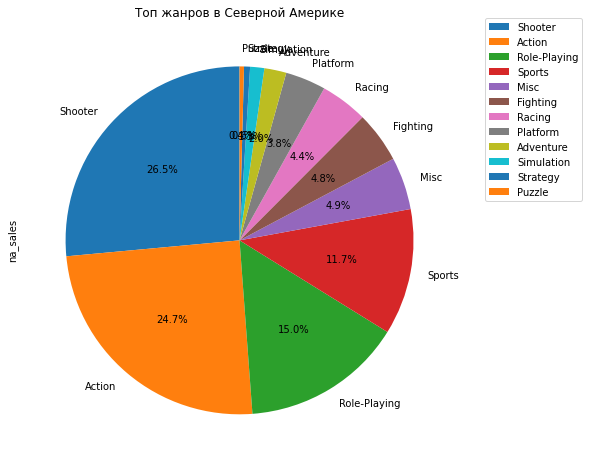

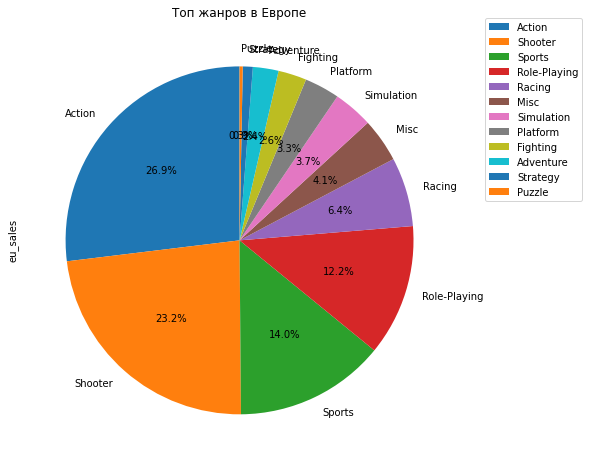

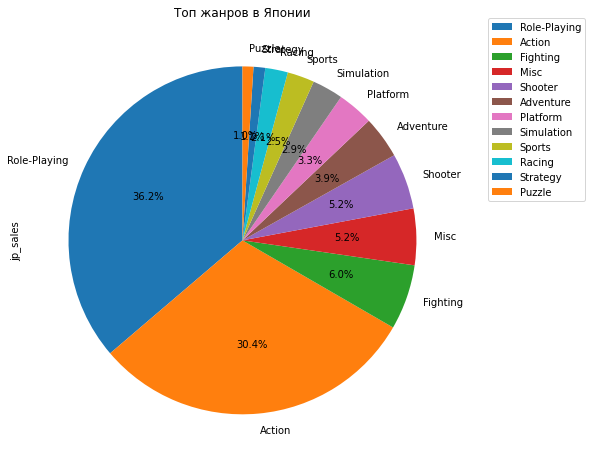

In [125]:
#Создадим 3 переменные, где сгруппируем продажи в отдельном регионе и жанрам.
#Далее построим для каждой переменной круговую диаграмму

grouped_na = games_filtered.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False)
grouped_na.plot(x = 'genre', y = 'na_sales',kind = 'pie', figsize = (8,8),autopct='%1.1f%%',
                title = 'Топ жанров в Северной Америке', startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.8))

grouped_eu = games_filtered.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False)
grouped_eu.plot(x = 'genre', y = 'eu_sales',kind = 'pie', figsize = (8,8),autopct='%1.1f%%',
                title = 'Топ жанров в Европе', startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.8))

grouped_jp = games_filtered.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False)
grouped_jp.plot(x = 'genre', y = 'jp_sales',kind = 'pie', figsize = (8,8),autopct='%1.1f%%',
                title = 'Топ жанров в Японии', startangle=90)

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.8))
plt.show()

В Северной Америке самые популярные жанры:
- Shooter 26.5%
- Action 24.7%
- RPG 15%
- Sports 11.7%  
- Misc 4.9%


В Европе самые популярные жанры:
- Action 26.9%
- Shooter 23.2% 
- Sports 14%
- RPG 12.2%
- Racing 6.4%

В Японии самые популярные жанры:
- RPG 36.2%
- Action 30.4%
- Fighting 6%
- Misc 5.2%
- Shooter 5.2%

Ситуация по играм в Северной Америке и Европе практически идентичная. Топ-5 очень похож в этих регионах.
В Японии лидером жанров является RPG с более явным преимуществом, далее Action, Fighting, Misc и Shooter. 

- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе


In [126]:
#Построим какие бывают рейтинги
print(games_filtered['rating'].unique())

#Сгруппируем по региону и рейтингу
genre_sales_na = games_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_sales_eu = games_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_sales_jp = games_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

['unrated' 'M' 'E' 'T' 'E10+']


Опишем значение рейтинга ESRB:
- 'E' - 'Все возраста'
- 'E10+' - '10+'
- 'T' - '13+'
- 'M' - '17+'
- 'AO' - '18+'
- 'RP' - 'Рейтинг ожидается'
- 'K-A' - 'Все возраста' (старое значение)
- 'EC' - '3+'
- 'unrated' - 'Рейтинга нет'

In [127]:
#Переименуем рейтинг 'K-E' на 'E', так как у них одно и то же значение
#games_filtered['rating'] = games_filtered['rating'].replace('K-A','E')
games_filtered['rating'].unique()

array(['unrated', 'M', 'E', 'T', 'E10+'], dtype=object)

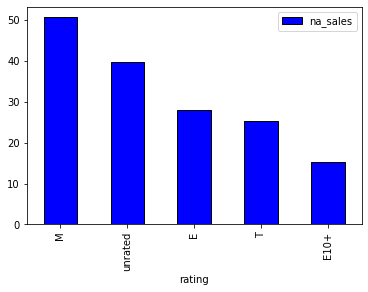

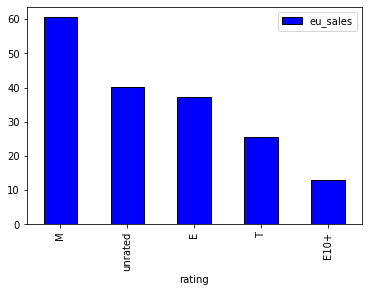

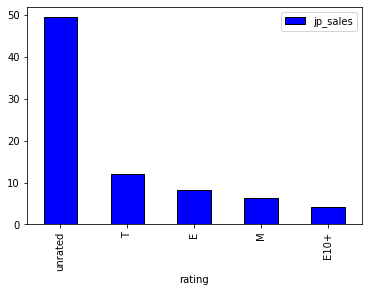

In [128]:
#Сгруппируем данные по рейтингу и продажам. Далее выведем на экран столбчатые диаграммы
games_filtered.groupby(by = 'rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color = 'blue',edgecolor = 'black')
games_filtered.groupby(by = 'rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color = 'blue',edgecolor = 'black')
games_filtered.groupby(by = 'rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color = 'blue',edgecolor = 'black')

plt.show()




На графиках видим количество проданных игр по рейтингу ESRB. В Северной Америке и Европе схожие графики. 
- В Северной Америке больше всего проданных игр с рейтингом  M (17+) - 50млн, Игры без ретинга ~ 40 млн, E (Для всех возратов) - 27млн, далее рейтинг T (13+) - 25 млн и E10+ ~ 15 млн.
- В Европе очень схожее распределение: M - 60млн, Unrated - 40 млн, E - 37 млн, T - 25 млн и E10+ - 13 млн.
- В Японии на первом месте игры без рейтинга ~ 50млн. Далее идут T - 12 млн, E - 9 млн, M - 7 млн и E10+ - 4 млн
# 
Объяснить лидерство в Японии игр без рейтинга можно так. ESRB является американской системой оценок игр и  возможно эта система не популярна в Азии и в частности в Японии, поэтому многие игры местного производства выходят на рынок без такой оценки.

# Шаг 5. Проверим гипотезы

## Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC. 

- H0 - средний пользовательский рейтинг у Xbox One и PC одинаковый 
- H1 - средний пользовательский рейтинг у Xbox One и у PC различается



In [129]:
#Создадим переменные по платформам Xbox и PC

xbox_ratings = games_filtered[(games_filtered['platform'] == 'XOne') & (games_filtered['user_score'] > 0)]['user_score']
pc_ratings = games_filtered[(games_filtered['platform'] == 'PC') & (games_filtered['user_score'] > 0)]['user_score']

#Проведем t-тест для двух независимых выборок 

alpha = 0.05  
results = st.ttest_ind(xbox_ratings, pc_ratings)

print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средний пользовательский рейтинг у Xbox One и у PC различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средний пользовательский рейтинг у Xbox One и PC одинаковый")


p-значение: 0.4875375907642625
Не получилось отвергнуть нулевую гипотезу: средний пользовательский рейтинг у Xbox One и PC одинаковый


Не получилось отвергнуть нулевую гипотезу. Это значит у нас нет оснований утверждать, что средние пользовательские рейтинги на Xbox One и PC значимо различаются. Выведем эти показатели.


In [130]:
print ('Пользовательский рейтинг Xbox One:', xbox_ratings.mean())
print ('Пользовательский рейтинг PC:', pc_ratings.mean())

Пользовательский рейтинг Xbox One: 7.0227272727272725
Пользовательский рейтинг PC: 6.792500000000001


Пользовательский рейтинг игр на Xbox One выше на 0.22. Это достаточно значимая разница, учитывая количество выпускаемых игр. 

## Гипотеза о равенстве пользовательских рейтингов жанров Action и Sports.

- H0 - средние пользовательские рейтинги жанра Action и Sports одинаковые
- H1 - средние пользовательские рейтинги жанра Action и Sports отличаются

In [131]:
action_ratings = games_filtered[(games_filtered['genre'] == 'Action') & (games_filtered['user_score'] > 0)]['user_score']
sports_ratings = games_filtered[(games_filtered['genre'] == 'Sports') & (games_filtered['user_score'] > 0)]['user_score']

alpha = 0.05  
results = st.ttest_ind(action_ratings, sports_ratings)

print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средний пользовательский рейтинг Action и Sports различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средний пользовательский рейтинг Action и Sports одинаковый")


p-значение: 1.3665726646393027e-06
Отвергаем нулевую гипотезу: средний пользовательский рейтинг Action и Sports различается


In [132]:
#Посмотрим на значения
print ('Пользовательский рейтинг Action:', action_ratings.mean())
print ('Пользовательский рейтинг Sports:', sports_ratings.mean())

Пользовательский рейтинг Action: 7.0204545454545455
Пользовательский рейтинг Sports: 5.815555555555555


Отвергли нулевую гипотезу, а это значит, что есть основания утверждать о различии средних пользовательских рейтингов жанров Action и Sports. Средний рейтинг выше у игр жанра Action на 1.18, чем у жанра Sports.

# Выводы по исследованию.

# Подготовили данные:
1. Заменили названия столбцов, привели к нижнему регистру.
2. Преобразовали данные в нужные типы:
   - 'year_of_release' был преобразован в тип данных datetime;
   - 'critic_score' и 'user_score' были преобразованы в числовой тип данных.
3. Обработали дубликаты по двум столбцам Название-Платформа;
4. Пропуски в столбцах 'critic_score', 'user_score', 'rating' поменяли на '0', так как заполнение их средними или медианными значениями может исказить анализ. Обработали аббревиатуру 'tbd' в столбце пользовательской оценки также заменили на '0', так как этот показатель означает нехватку оценок;
5. В столбцах 'genre' и 'name' пропуски заполнили значением 'unknown';
6. Создали новый столбец 'total_sales', где посчитали сумму всех продаж по регионам.

# Далее перешли к исследованию:

1. Проанализировали количество выпущенных игр по годам, в 2008-2009 году были самые высокие показатели по выпущенным играм, далее был спад, скорее всего из-за популяризации мобильных гаджетов;
2. Изучили изменения продаж по платформам. Выявили топ-5 платформ с наибольшими суммарными продажами : PS2, X360, PS3, Nintendo Wii и Nintendo DS;
3. Выявлен актуальный период для анализа данных - начиная с 2014 года;
4. Проанализировали график с прожами игр с 2014 года, выявяли что средний показатель "жизни" приставки ~10 лет, новые поколения заменяют всегда старые;
5. Построили "ящик с усами" по глобальным продажам игр топ-5 платформ в 2016 году - PS4, Nintendo 3Ds и следом Nintendo Wii являлись самыми актуальными и прибыльными по данным за 2016 год;
6. Далее построили "Ящик с усами" для топ-3 платформ за актуальный период и изучили глобальные продажи;
7. Изучили влияние отзывов пользователей и критиков на продажи игр, определили что коэффицент корреляции слабый, но положительный в обоих случаях ~ 0.2;
8. Проанализировали распределение игр по жанрам. Топ-3 жанра - Action, Sports и Shooter.

# Составили портрет пользователя по региону:

1. Пользователи Северной Америки отдают предпочтения следующим приставкам (топ-3) PS4, Nintendo 3DS, XOne. Предпочитаемые жанры Shooter, Action, RPG. Рейтинг "17+", Без рейтинга и "для всех возрастов" также самые актуальные в этом регионе.
2. Пользователи из Европы предпочитают PS4, 3DS, WiiU . Любимые жанры как и в Европе - Action, Shooter, Sports. С рейтингом ESRB все идентично с Америкой.
3. В Японии самые популярные приставки(топ-3) за актуальный период 3DS, PS4, PSV.  Самый попялярный жанр - RPG 36%, Action 30.4%, Fighting 6%. В Японии есть своя рейтинговая модель CERO, поэтому в нашей таблице с рейтингом ESRB в Японии лидирующее место занимают Игры без рейтинга. 

# Проверили гипотезы:

- о равенстве средних пользовательских рейтингов платформ Xbox One и PC;
- о различии средних пользовательских рейтингов жанров Action и Sports.
Сделали выводы, что пользовательский рейтинг игр Xbox One выше рейтинга на PC на 0.22 и средний рейтинг выше у игр жанра Action на 1.18, чем у жанра Sports.

# 
В результате проведенного исследования были выявлены основные тенденции на рынке компьютерных игр, определены потенциально прибыльные платформы и жанры, а также изучено влияние различных факторов на продажи игр. Полученные данные могут быть использованы для формирования стратегии развития компании в индустрии видеоигр.



# Рекомендации для интернет-магазина игр Стримчик:


1. Платформы: 
- Рекламируйте игры на платформах PS4 и Nintendo 3DS, так как они показывают хорошие результаты по продажам в различных регионах.

2. Жанры:
- Сосредоточьтесь на жанрах Action и Shooter, так как они популярны во всех регионах и имеют высокие продажи, в Японии большим спросом пользуются PRG игры.

3. Рейтинг ESRB:
- Игры с рейтингом "17+" и "для всех возрастов" также показывают хорошие результаты продаж, поэтому стоит уделить внимание играм с этими рейтингами.

4. Регион:
- В Северной Америке и Европе рекламируйте игры на PS4, а в Японии обратите внимание на 3DS, так как эти платформы наиболее популярны в соответствующих регионах.

5. Отзывы:
- Учитывайте отзывы пользователей и критиков при выборе игр для рекламы, так как они могут оказать влияние на продажи. Важно отметить, что хотя корреляция между отзывами и продажами слабая, положительные отзывы могут привлечь больше покупателей.

# 

Таким образом, рекомендуется сосредоточить рекламный бюджет на играх для платформ PS4 и Nintendo 3DS, жанрах Action и Shooter с рейтингом "17+" и "для всех возрастов", а также учитывать региональные особенности при планировании рекламных кампаний.